<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/1_Histogram_Linearisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


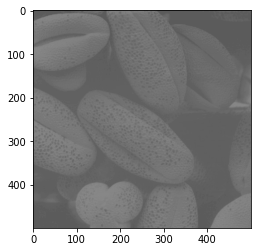

In [10]:
im = imread("/content/drive/MyDrive/samples/Pollen3.jpg", pilmode="L")

plt.imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
plt.show()

# Exercise 2: Spatial Filtering

## Task 1: Histogram Linearisation

An image histogram contains the (absolute or relative) frequencies of the grayvalues present in an image.

Histogram linearisation is a grayvalue transformation that enhances the contrast of an image by distributing the grayvalues more uniformly over the entire range `[0 .. 255]`.

1. Complete the function `histogram` for computing the histogram of an image!
2. Can you compute the histogram more efficiently than manually iterating over all pixels? Try your luck with `histogram2`!
3. Implement histogram linearisation by completing the function `linearize_histogram` and test it on suitable examples!

In [4]:
def histogram(im):
    
    h, w = im.shape
    hist = np.zeros(256, dtype=np.int32)
    
    # Iterate over all pixels and increase the count of the respective grayvalues.
    for i in range(h):
        for j in range(w):
            
            hist[im[i,j]] = hist[im[i,j]] + 1
            ### TODO: increment count of the grayvalue at this location
            pass
    
    return hist

In [7]:
def histogram2(im):
    
    h, w = im.shape
    hist = np.zeros(256, dtype=np.int32)
    
    # Iterate over all possible grayvalues and count their occurrences in the image efficiently.
    for i in range(256):
        hist[i] = np.count_nonzero(im == i)
        ### TODO: count occurrences of this grayvalue
        
    return hist

In [8]:
def plot_histogram(im, histo):
    
    fig, axs = plt.subplots(2,1, figsize=(16,12))
    
    axs[0].imshow(im, vmin=0, vmax=255, cmap=plt.cm.gray)
    axs[0].axis('off')
    
    axs[1].bar(x=np.arange(256), height=histo, width=1)
    
    plt.show()

CPU times: user 749 ms, sys: 0 ns, total: 749 ms
Wall time: 754 ms
CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 11.3 ms
True


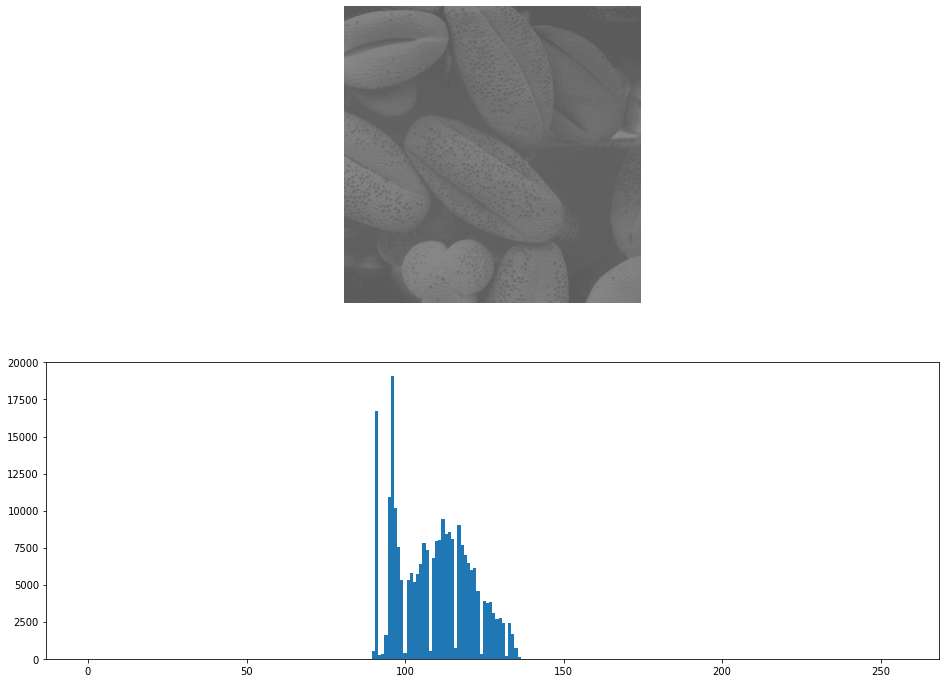

In [11]:
# Compare run-time
%time hist1 = histogram(im)
%time hist2 = histogram2(im)

# Check if both implementations are equivalent
print((hist1==hist2).all())

# Plot image and its histogram
plot_histogram(im, hist2)

## hist() interpretation
Using np.count_nonzero turns out to be 70 times more efficient. I expected another result, as the iteration over whole image happens only once in hist1, and there are 256 iterations in hist2.

Probably the reason is that writing the values to hist[] list takes more time than pixel iteration. there are significantly more "writes" in hist1.

In [74]:
def linearize_histogram(im):
    
    h, w = im.shape
    
    # Compute the histogram of the image
    histo = histogram2(im)
    
    # TODO: compute cumulative distribution function (CDF)
    cumm_histo = histo # Compute cumulative sum to turn PDF into CDF
    for i in range(1, len(histo)):
        cumm_histo[i] = cumm_histo[i-1] + histo[i]

    #normalize to 0-255
    cumm_histo_norm = ((cumm_histo - cumm_histo.min()) * 255 / (cumm_histo.max() - cumm_histo.min())).astype('uint8')

    # plt.plot(cumm_histo_norm)

    # TODO: Compute resulting image with a linearized histogram by assigning to each pixel
    # the value of the CDF for its original grayvalue.
    res = np.zeros_like(im)
    for i in range(h):
        for j in range(w):
            res[i,j] = cumm_histo_norm[im[i,j]] ### FILL ME!
    # plt.imshow(res, vmin=0, vmax=255, cmap=plt.cm.gray)
    # plt.show()
    return res

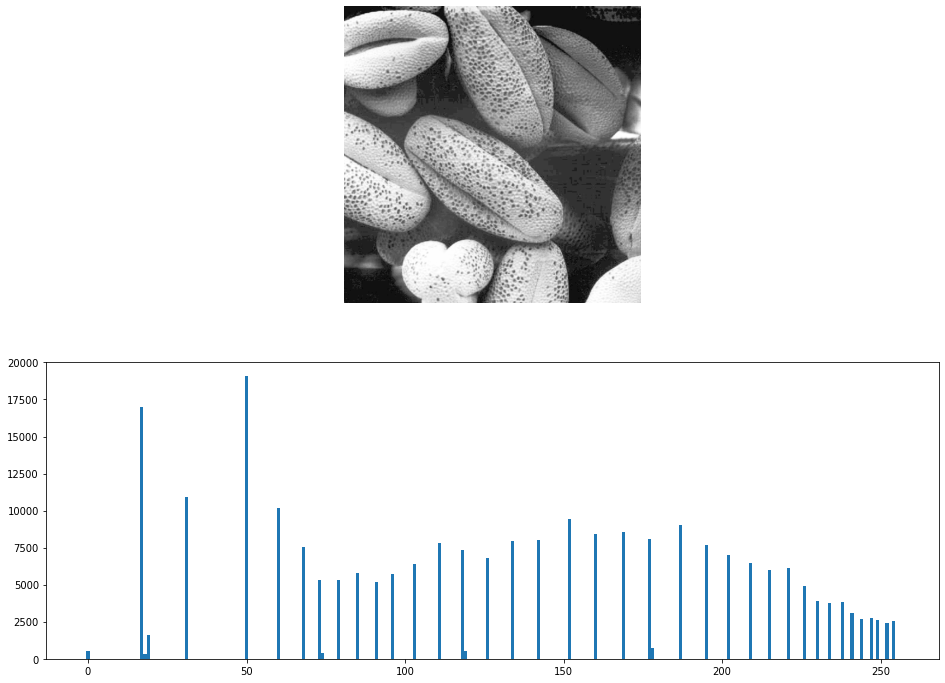

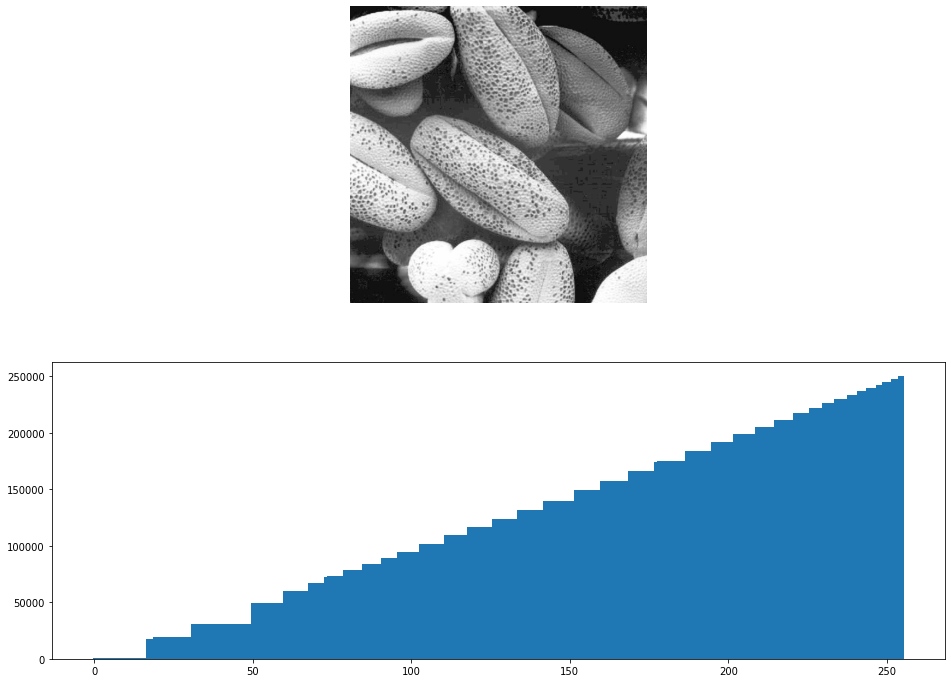

In [75]:
lin_im = linearize_histogram(im)

histo = histogram2(lin_im)

cum_histo = np.cumsum(histo)

plot_histogram(lin_im, histo)
plot_histogram(lin_im, cum_histo)

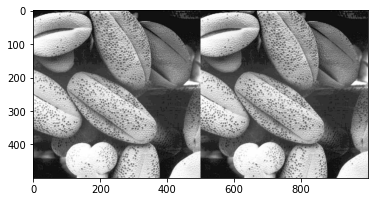

In [76]:
# compare with cv2 function
import cv2
equ = cv2.equalizeHist(im)
  
# stacking images side-by-side
res = np.hstack((equ, lin_im))
  
# show image input vs output
plt.imshow(res, 'gray')

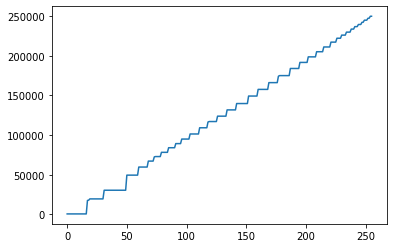

In [77]:
cum_histo2 = np.cumsum(equ)
plt.plot(cum_histo)

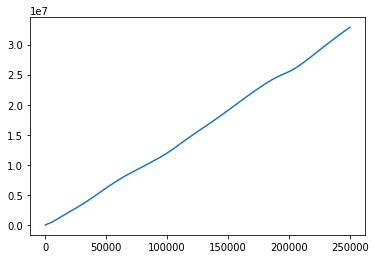

In [78]:
plt.plot(cum_histo2)

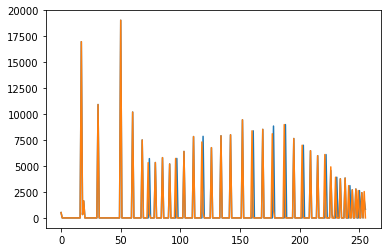

In [79]:
plt.plot(histogram2(equ))
plt.plot(histogram2(lin_im))

result looks nice. cv2 function uses slightlry different approach that makes the normalized image smoother (probably due to my rounding at the stage of CDF calculation).